## 1. Import the libraries:

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Load the dataset:

In [2]:
data = pd.read_csv("Insurance claims data.csv")

In [3]:
data.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


## 3. EDA:

#### Let's get a quick information on different columns:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

#### Check if there is any null-values:

In [5]:
data.isna().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

#### There are no any null-values. Let's see the size of the dataset:

In [8]:
print(f"The shape of the data is: {data.shape}.\nSo, in total, there are: {data.shape[0]} rows "
      f"and {data.shape[1]} columns.")

The shape of the data is: (58592, 41).
So, in total, there are: 58592 rows and 41 columns.


#### Below, it summarizes the data-types of the data we have:

In [13]:
data.dtypes.value_counts()

object     28
int64      10
float64     3
dtype: int64

#### Our target column is claim_status, let's see the difference in the counts:

In [14]:
data.claim_status.value_counts()

0    54844
1     3748
Name: claim_status, dtype: int64

In [18]:
diff_count = data.claim_status.value_counts()[0] - data.claim_status.value_counts()[1]
print(f"The difference between the counts is: {diff_count}")

The difference between the counts is: 51096


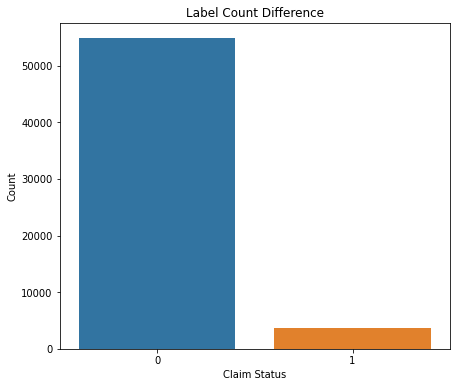

In [34]:
plt.figure(figsize=(7, 6))
sns.countplot(x=data.claim_status, data=data)
plt.title('Label Count Difference')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

#### Understaind the correlation:

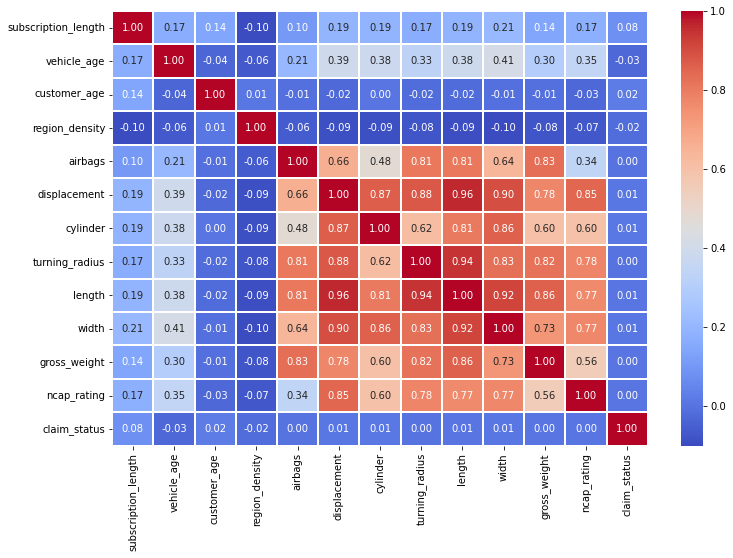

In [41]:
data_corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr, annot=True, linewidths=0.3, cmap='coolwarm', fmt='.2f')
plt.show()